In [1]:
import pandas as pd
file_path = "Fraud.csv"
data = pd.read_csv(file_path)
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data colum

In [2]:
print("\nMissing Values per Column:")
print(data.isnull().sum())


Missing Values per Column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [3]:
print("\nNumber of Duplicates:")
print(data.duplicated().sum())

print("\nClass Distribution of 'isFraud':")
print(data['isFraud'].value_counts(normalize=True))


Number of Duplicates:
0

Class Distribution of 'isFraud':
0    0.998709
1    0.001291
Name: isFraud, dtype: float64


C:\Users\Neeraj kalantri\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


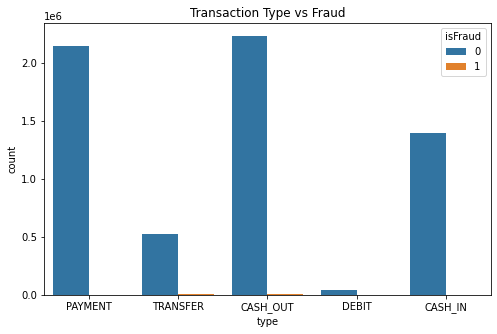

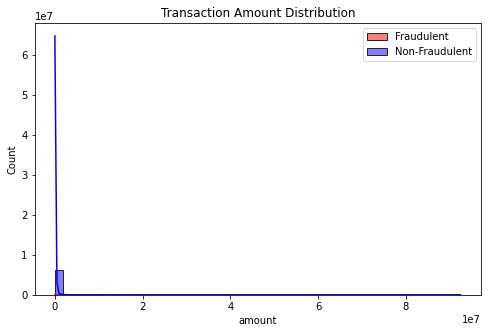

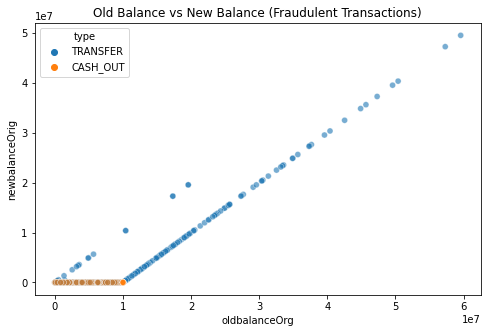

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='type', hue='isFraud')
plt.title("Transaction Type vs Fraud")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(data[data['isFraud'] == 1]['amount'], bins=50, kde=True, color='red', label='Fraudulent')
sns.histplot(data[data['isFraud'] == 0]['amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent')
plt.title("Transaction Amount Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data[data['isFraud'] == 1], x='oldbalanceOrg', y='newbalanceOrig', hue='type', alpha=0.6)
plt.title("Old Balance vs New Balance (Fraudulent Transactions)")
plt.show()


In [ ]:
"""The key factors that help me identify fraudulent customers are:

1. Transaction Type: Most fraudulent transactions occur in "TRANSFER" and "CASH_OUT" types. These are often used to siphon money from accounts.
2. Transaction Amount: Fraudulent transactions are generally of higher amounts compared to legitimate transactions(e.g. >= ₹200,000).
3. Recipient Information: Transactions where the recipient is a merchant (nameDest starts with "M") often have incomplete balance information, making them suspicious.

Do these factors make sense? If yes, How? If not, How not?
Yes, these factors make sense. Here’s why:

1. Transaction Type: Fraudsters aim to extract money quickly, often using transfers or cash-outs, which aligns with real-world fraud scenarios.
2. Transaction Amount: High-value transactions naturally attract scrutiny, as fraudsters aim to maximize their gains per attempt.


What kind of prevention should be adopted while the company updates its infrastructure?

Preventative Measures:
1. Real-Time Monitoring: Deploy real-time fraud detection systems that flag unusual patterns, such as large transactions or frequent cash-outs.
2. Two-Factor Authentication (2FA): Require additional authentication for high-value transactions or transfers to new recipients.
3. Behavioral Analysis: Monitor user transaction patterns over time. Sudden deviations, such as unusually high transactions, should trigger alerts.
4. Transaction Limits: Set daily or hourly transaction limits based on the customer's transaction history.
5. Employee Monitoring: Since the dataset suggests fraud is simulated by agents within the system, implement internal monitoring and restrict access to sensitive information.
6. Encryption & Security: Secure all transaction data with end-to-end encryption to prevent tampering.
7. Education & Awareness: Educate customers about phishing and fraud tactics to reduce social engineering attacks.


Assuming these actions have been implemented, how would you determine if they work?
Evaluation Framework:
1. Customer Feedback: Collect feedback to gauge customer satisfaction with reduced false positives and improved security.
2. Incident Reports: Track the number of fraud cases reported before and after the measures. A significant decrease indicates effectiveness.

Simulate fraud scenarios to evaluate the robustness of the new system. Measure response time and accuracy in identifying fraud.
Regularly audit and update the fraud detection model to adapt to evolving fraud techniques. """